# Statistical Analysis II - Practicum 2 (Week 9)

## Multivariate analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Principal component analysis

Resources from [url1](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/), [url2](https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa), [url3](https://towardsdatascience.com/from-covariance-matrix-to-principle-component-analysis-d101cc50934e), [url4](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

**Principle component analysis (PCA)*** is based on simple linear algebra operations (see more in _Lecture 7_ and following.

Among PCA uses: reduction of dimensionality of data (machine learning applications or other sort of problems prone to 'the curse of dimensionality', i.e. when the computational cost scales (super)linearly with the dimensionality (the number of variables at play) of the problem.

In [2]:
def covariance(X, Y):
    # Calculate the covariance between two random variables.
    xbar = np.mean(X)
    ybar = np.mean(Y)
    covar = 1 / (len(X) - 1) * np.sum( (X - xbar) * (Y - ybar) )
    return covar


def covariance_matrix(matrix):
    # Calculate the variance-covariance matrix.
    n_var = len(matrix.T)
    C = np.zeros([n_var, n_var])
    for ix_1, variable_1 in enumerate(matrix.T):
        for ix_2, variable_2 in enumerate(matrix.T):
            C[ix_1, ix_2] = covariance(variable_1, variable_2)
    return C

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [3]:
# define a matrix
Mat = np.array([[7, 5], [9, 1]])
print('Mat: ', Mat)
# calculate the mean of each column
M = np.mean(Mat.T, axis=1)
print('Mean: ', M)
# center columns by subtracting column means
C = Mat - M
print('Centred: ', C)
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print('Cov: ', V)
Cov = covariance_matrix(C)
print('Cov_function: ', Cov)
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print('eigenvectors: ', vectors)
print('eigenvalues: ', values)
# project data
P = vectors.T.dot(C.T)
print('project data:' , P.T)

Mat:  [[7 5]
 [9 1]]
Mean:  [8. 3.]
Centred:  [[-1.  2.]
 [ 1. -2.]]
Cov:  [[ 2. -4.]
 [-4.  8.]]
Cov_function:  [[ 2. -4.]
 [-4.  8.]]
eigenvectors:  [[-0.89442719  0.4472136 ]
 [-0.4472136  -0.89442719]]
eigenvalues:  [ 0. 10.]
project data: [[ 0.         -2.23606798]
 [ 0.          2.23606798]]


Correlation can also visualised well through heatmaps.

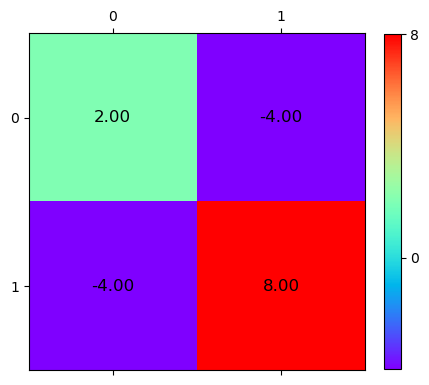

In [4]:
img = plt.matshow(V, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-8, 0, 8], fraction=0.045) 
for x in range(V.shape[0]):
    for y in range(V.shape[1]):
        plt.text(x, y, "%0.2f" % V[x,y], size=12, color='black', ha="center", va="center")
plt.show()

We can make use of a class directly available from the sklearn library, **PCA**, documentation available from [here](
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [5]:
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(Mat)
# access values and vectors
print('components:' , pca.components_)
print('explained variance: ', pca.explained_variance_)
# transform data
Tr = pca.transform(Mat)
print('transformed components: ', Tr)

components: [[ 0.4472136  -0.89442719]
 [ 0.89442719  0.4472136 ]]
explained variance:  [10.  0.]
transformed components:  [[-2.23606798e+00  1.11022302e-16]
 [ 2.23606798e+00 -1.11022302e-16]]


Suppose we have more points:

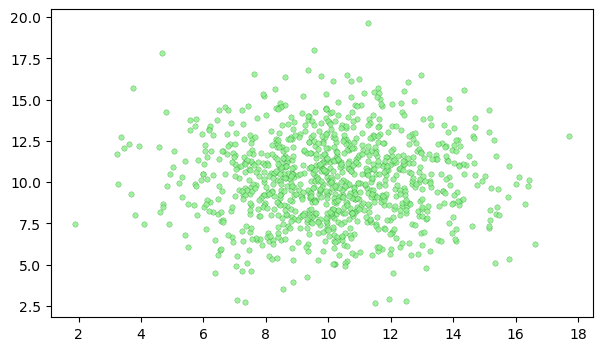

In [6]:
n_samples = 1000
n_variables = 2
mu = 10
sigma = 2.5

np.random.seed(42)
X = np.random.normal(mu, sigma, size=(n_samples, n_variables))

# Plotting (Additional plot styling is shown in the Notebook)
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X[:, 0], X[:, 1], alpha=0.85, color='lightgreen', edgecolors='green', s=15, linewidth=0.2)

In [7]:
(x, y) = X.T  # split into two features

print(f"Variance for x   : {covariance(x, x)}")
print(f"Covariance of x,y: {covariance(x, y)}")

Variance for x   : 5.779256243644815
Covariance of x,y: 0.01576313225761504


pca components:  [[ 0.02389445  0.99971449]
 [-0.99971449  0.02389445]]
pca explained variance:  [6.43876644 5.77887948]


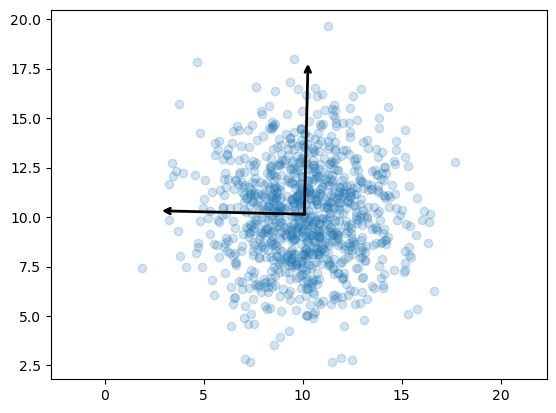

In [8]:
pca = PCA(n_components=2)
pca.fit(X)
print('pca components: ', pca.components_)

print('pca explained variance: ', pca.explained_variance_)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

We would have expected to get the square of the standard deviation, we were close, but the value showed a mismatch due to the limited population.

How do things change if one is using actually correlated data?

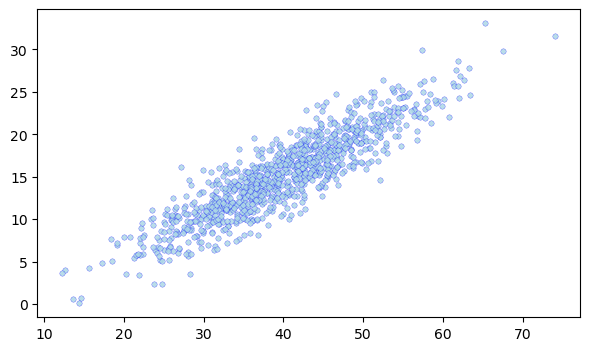

In [9]:
# Scale x and y distribution
sx, sy = 0.8, 4
Scale = np.array([
    [ sx, 0 ], 
    [ 0,  sy],
])

# Rotate data
theta = 0.35 * np.pi
Rot = np.array([
    [ np.cos(theta), -np.sin(theta)], 
    [ np.sin(theta),  np.cos(theta)],
])

T = Scale.dot(Rot)

# Transform data
X2 = X.dot(T)
X2[:,1] += 4  # lift data a bit to not have negative weights

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X2[:, 0], X2[:, 1], alpha=0.85, color='lightblue', edgecolors='blue', s=15, linewidth=0.2)

We can visualise the principal components:

pca components:  [[ 0.89123699  0.4535379 ]
 [-0.4535379   0.89123699]]
pca explained variance:  [103.01426052   3.69869838]


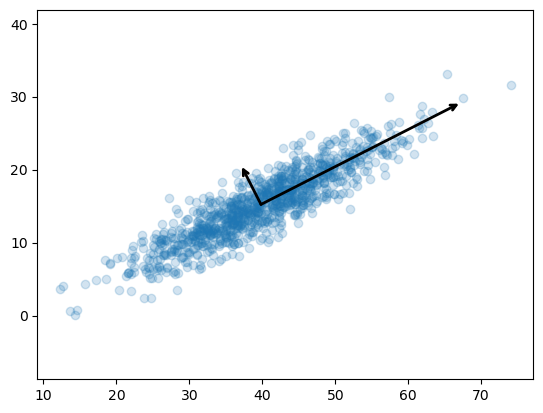

In [10]:
pca = PCA(n_components=2)
pca.fit(X2)
print('pca components: ', pca.components_)

print('pca explained variance: ', pca.explained_variance_)

# plot data
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

How does the covariance matrix look like now?

Let us now consider an example of a larger data sets with more variables (_features_ in the machine learning jaergon).

In [11]:
winedata = load_wine()
X, y = winedata['data'], winedata['target']

print('variables: ', X.shape)
print('output variables: ', y.shape)

variables:  (178, 13)
output variables:  (178,)


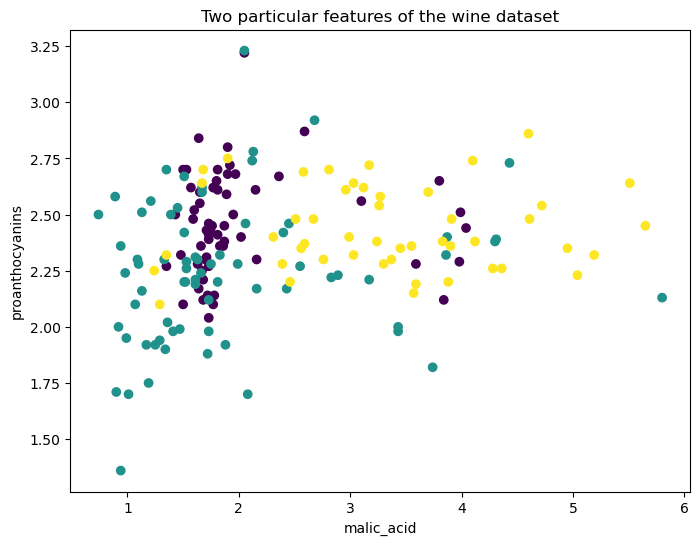

In [12]:
# Let's produce a scatter plot of the relations between the variables
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][8])
plt.title("Two particular features of the wine dataset")
plt.show()

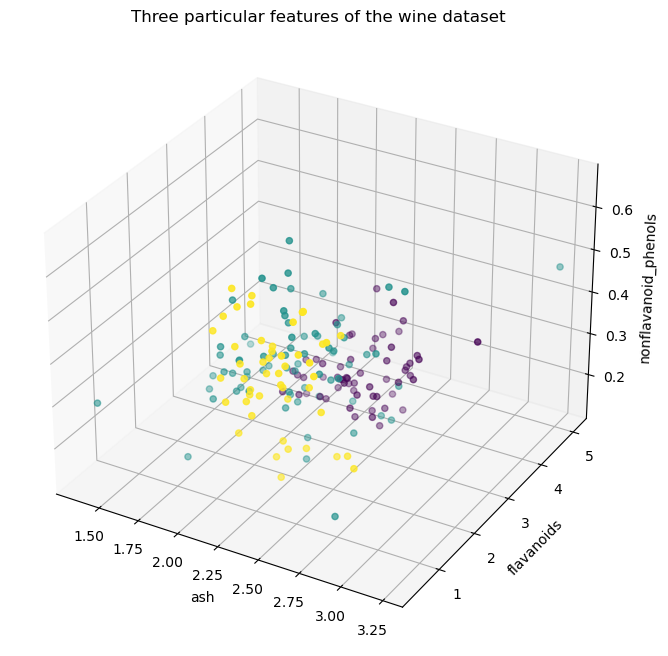

In [13]:
# Or even a 3d-plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,2], X[:,6], X[:,7], c=y)
ax.set_xlabel(winedata["feature_names"][2])
ax.set_ylabel(winedata["feature_names"][6])
ax.set_zlabel(winedata["feature_names"][7])
ax.set_title("Three particular features of the wine dataset")
plt.show()

We can perform a PCA to try to tell apart the different classes of wine

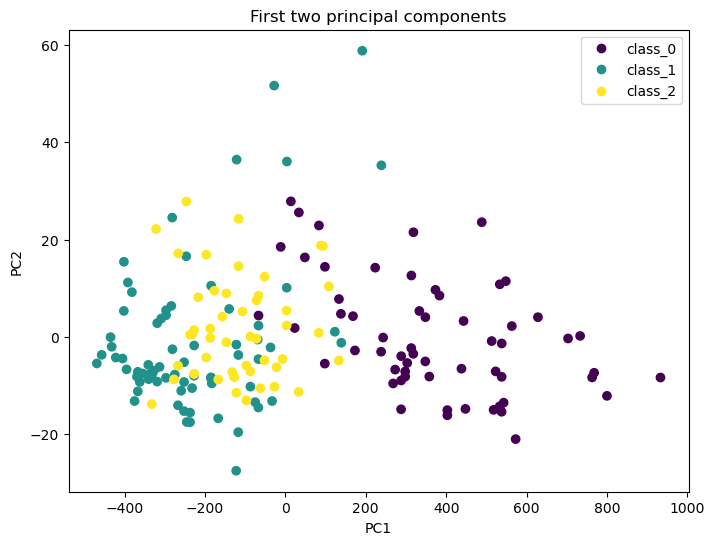

In [14]:
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

They are not so well separated, let's try by normalising the variables (setting $E = 0, \sigma = 1$)

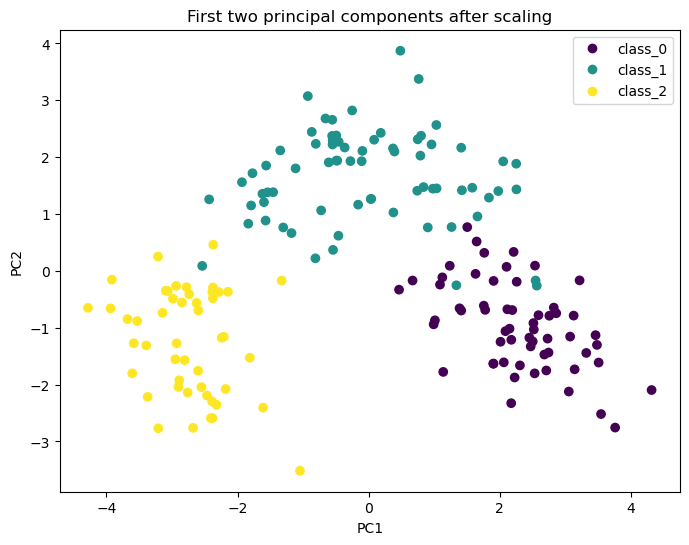

In [15]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

How many components does the PCA show?

In [16]:
len(pca.components_)

13

How are the pca components related?

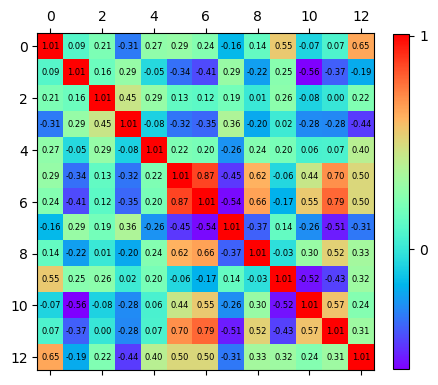

In [17]:
Cov = pca.get_covariance()

img = plt.matshow(Cov, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045) 
for x in range(Cov.shape[0]):
    for y in range(Cov.shape[1]):
        plt.text(x, y, "%0.2f" % Cov[x,y], size=6, color='black', ha="center", va="center")
plt.show()

What fractions of the variance do these components explain?

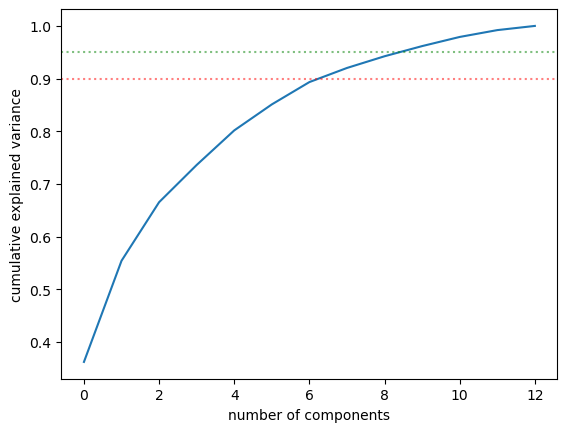

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle=':',alpha=.5)
plt.axhline(y=0.95, color='g', linestyle=':',alpha=.5);

PCA can be used for dimensionality reduction (say, one wants _n_ components that apportion at least 90, 95, or 99% of the variance). In this way one can reduce the dimensionality of the problem.

One caveat of PCA is that it may be difficult communicating the results of the analysis in terms of understanding the significant of the principal components as combination of the base variables.